# Week 1 — Linear Regression

_File: 01-linear-regression.ipynb_

Goal: implement linear regression with NumPy.
Steps: derive gradients, implement training loop, plot loss.

Following Andrew Ng ML Course - Week 1

## Day 1 — Setup & Imports

### Quick note on w and b

- **w** is the slope parameter (how steep the line is)
- **b** is the bias parameter (where the line crosses the y-axis)
- We tweak w and b to make predictions line up with the data (by minimizing the cost).

## Day 2 — Generate & Visualize a Synthetic Linear Dataset

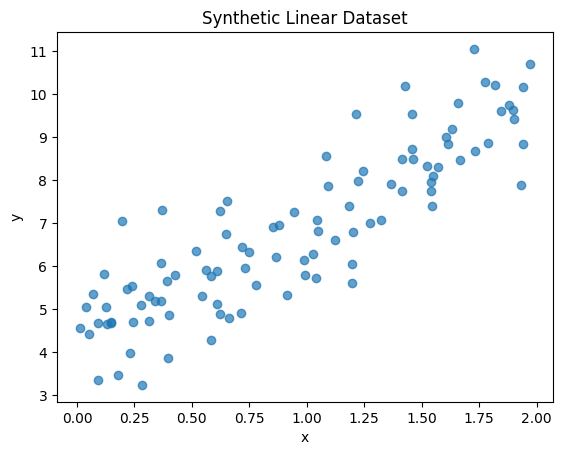

In [1]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(42)  # keep results reproducible each run

# Fake (but realistic) linear data:
# x values live roughly in [0, 2]
x = 2 * np.random.rand(100)  # shape (100,) - 1D array

# The underlying rule used to generate targets:
# y = 4 + 3x + ε, where ε is small Gaussian (normal) noise ~ N(0, 1)
# Noise makes points look like real measurements (never perfectly on the line).
y = 4 + 3 * x + np.random.randn(100)  # shape (100,) - 1D array

# Visual check: should look like a fuzzy line with positive slope
plt.scatter(x, y, alpha=0.7)
plt.xlabel("x")
plt.ylabel("y")
plt.title("Synthetic Linear Dataset")
plt.show()

## Days 3 to 5 — Cost Function & Gradient Descent

**Goal today**

- Define hypothesis and **cost function** J(w,b)
- Implement **gradient descent**
- Train on synthetic data and **watch the cost decrease**

In [2]:
def hypothesis(w, b, x):
    """Linear hypothesis: h(x) = w*x + b"""
    return w * x + b

def cost_function(w, b, x, y):
    """Mean Squared Error cost function"""
    m = len(x)
    h = hypothesis(w, b, x)
    return (1/(2*m)) * np.sum((h - y)**2)

def gradient_descent(w, b, x, y, alpha, iterations):
    """Gradient descent algorithm"""
    m = len(x)
    cost_history = []

    for i in range(iterations):
        # Compute predictions
        h = hypothesis(w, b, x)

        # Compute gradients
        dw = (1/m) * np.sum((h - y) * x)
        db = (1/m) * np.sum(h - y)

        # Update parameters
        w = w - alpha * dw
        b = b - alpha * db

        # Store cost for plotting
        cost = cost_function(w, b, x, y)
        cost_history.append(cost)

    return w, b, cost_history

# Test with sample data
w_test, b_test, costs = gradient_descent(0, 0, x, y, alpha=0.01, iterations=1000)

print(f"Final w: {w_test:.3f}")
print(f"Final b: {b_test:.3f}")
print(f"Final cost: {costs[-1]:.3f}")

Final w: 2.931
Final b: 4.033
Final cost: 0.408


## Day 6 — Visualization and Analysis

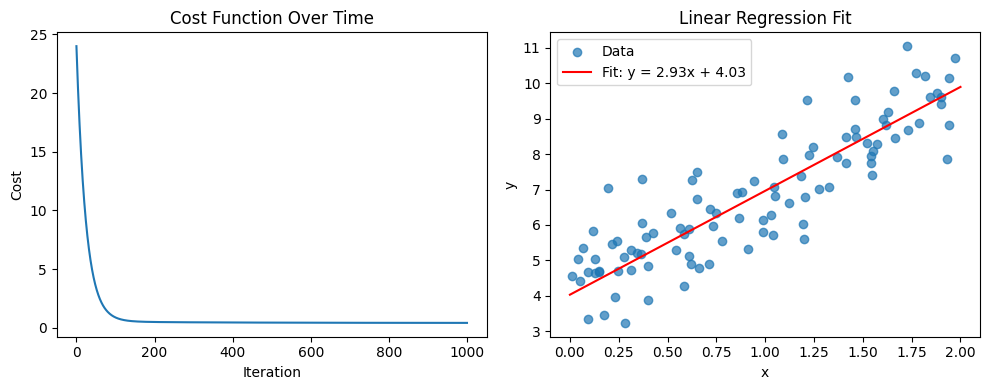

In [3]:
# Plot the cost function over iterations
plt.figure(figsize=(10, 4))

plt.subplot(1, 2, 1)
plt.plot(costs)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Time')

# Plot the final fit
plt.subplot(1, 2, 2)
plt.scatter(x, y, alpha=0.7, label='Data')
x_line = np.linspace(0, 2, 100)
y_line = hypothesis(w_test, b_test, x_line)
plt.plot(x_line, y_line, 'r-', label=f'Fit: y = {w_test:.2f}x + {b_test:.2f}')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Linear Regression Fit')
plt.legend()

plt.tight_layout()
plt.show()

## Day 7 — Testing and Validation

In [4]:
# Test with new data points
x_new = np.array([0.5, 1.0, 1.5, 2.0])
y_new = hypothesis(w_test, b_test, x_new)

print("Predictions for new data points:")
for i in range(len(x_new)):
    print(f"x = {x_new[i]:.1f}, predicted y = {y_new[i]:.3f}")

# Compare with true relationship (y = 4 + 3x)
y_true = 4 + 3 * x_new
print("\nTrue values (y = 4 + 3x):")
for i in range(len(x_new)):
    print(f"x = {x_new[i]:.1f}, true y = {y_true[i]:.1f}")

# Calculate prediction error
mse = np.mean((y_new - y_true)**2)
print(f"\nMean Squared Error: {mse:.3f}")

Predictions for new data points:
x = 0.5, predicted y = 5.499
x = 1.0, predicted y = 6.964
x = 1.5, predicted y = 8.429
x = 2.0, predicted y = 9.895

True values (y = 4 + 3x):
x = 0.5, true y = 5.5
x = 1.0, true y = 7.0
x = 1.5, true y = 8.5
x = 2.0, true y = 10.0

Mean Squared Error: 0.004


## Day 8 — Advanced Topics

### Normal Equation (Alternative to Gradient Descent)

In [5]:
def normal_equation(x, y):
    """Solve linear regression using normal equation"""
    # Add bias term (column of ones)
    X = np.column_stack([np.ones(len(x)), x])

    # Normal equation: θ = (X^T X)^(-1) X^T y
    theta = np.linalg.inv(X.T @ X) @ X.T @ y

    return theta[0], theta[1]  # b, w

# Solve using normal equation
b_normal, w_normal = normal_equation(x, y)

print(f"Normal equation results:")
print(f"w: {w_normal:.3f}")
print(f"b: {b_normal:.3f}")

print(f"\nGradient descent results:")
print(f"w: {w_test:.3f}")
print(f"b: {b_test:.3f}")

Normal equation results:
w: 2.770
b: 4.215

Gradient descent results:
w: 2.931
b: 4.033


### Feature Scaling

In [6]:
def feature_scaling(x):
    """Z-score normalization"""
    return (x - np.mean(x)) / np.std(x)

# Apply feature scaling
x_scaled = feature_scaling(x)

# Train on scaled data
w_scaled, b_scaled, costs_scaled = gradient_descent(0, 0, x_scaled, y, alpha=0.01, iterations=1000)

print(f"Scaled data results:")
print(f"w: {w_scaled:.3f}")
print(f"b: {b_scaled:.3f}")
print(f"Final cost: {costs_scaled[-1]:.3f}")

Scaled data results:
w: 1.640
b: 6.820
Final cost: 0.403


## Day 9 — Multiple Features

In [7]:
def hypothesis_multi(w, b, X):
    """Multi-feature hypothesis: h(X) = Xw + b"""
    return X @ w + b

def cost_function_multi(w, b, X, y):
    """Multi-feature cost function"""
    m = len(y)
    h = hypothesis_multi(w, b, X)
    return (1/(2*m)) * np.sum((h - y)**2)

def gradient_descent_multi(w, b, X, y, alpha, iterations):
    """Multi-feature gradient descent"""
    m = len(y)
    cost_history = []

    for i in range(iterations):
        # Compute predictions
        h = hypothesis_multi(w, b, X)

        # Compute gradients
        dw = (1/m) * X.T @ (h - y)
        db = (1/m) * np.sum(h - y)

        # Update parameters
        w = w - alpha * dw
        b = b - alpha * db

        # Store cost for plotting
        cost = cost_function_multi(w, b, X, y)
        cost_history.append(cost)

    return w, b, cost_history

# Create multi-feature dataset
X = np.column_stack([x, x**2, np.sin(x)])  # x, x^2, sin(x)
w_multi = np.zeros(X.shape[1])
b_multi = 0

# Train multi-feature model
w_multi, b_multi, costs_multi = gradient_descent_multi(
    w_multi, b_multi, X, y, alpha=0.01, iterations=1000
)

print(f"Multi-feature results:")
print(f"w: {w_multi}")
print(f"b: {b_multi:.3f}")
print(f"Final cost: {costs_multi[-1]:.3f}")

Multi-feature results:
w: [1.32624244 0.46228331 1.34394896]
b: 4.065
Final cost: 0.410


## Day 10 — Model Evaluation

R-squared scores:
Single feature: 0.766
Multi-feature: 0.766


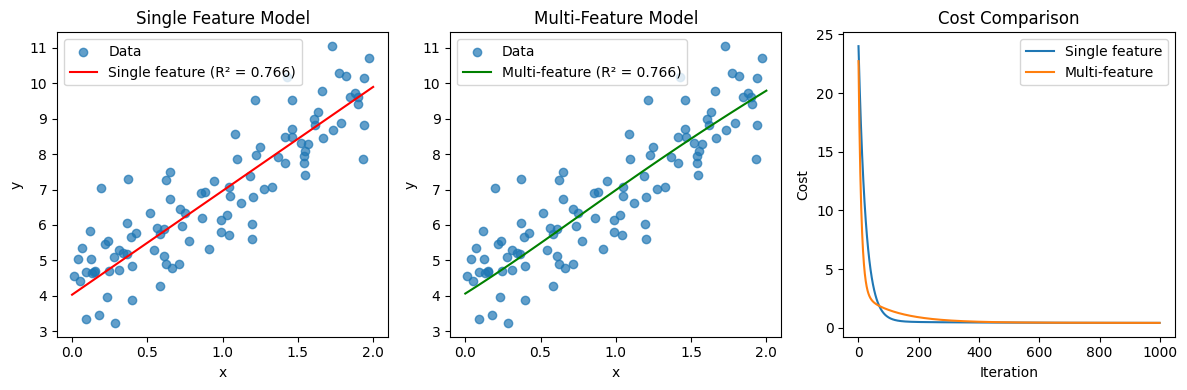

In [8]:
def r_squared(y_true, y_pred):
    """Calculate R-squared coefficient"""
    ss_res = np.sum((y_true - y_pred) ** 2)
    ss_tot = np.sum((y_true - np.mean(y_true)) ** 2)
    return 1 - (ss_res / ss_tot)

# Evaluate single-feature model
y_pred_single = hypothesis(w_test, b_test, x)
r2_single = r_squared(y, y_pred_single)

# Evaluate multi-feature model
y_pred_multi = hypothesis_multi(w_multi, b_multi, X)
r2_multi = r_squared(y, y_pred_multi)

print(f"R-squared scores:")
print(f"Single feature: {r2_single:.3f}")
print(f"Multi-feature: {r2_multi:.3f}")

# Plot comparison
plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.scatter(x, y, alpha=0.7, label='Data')
x_line = np.linspace(0, 2, 100)
y_line = hypothesis(w_test, b_test, x_line)
plt.plot(x_line, y_line, 'r-', label=f'Single feature (R² = {r2_single:.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Single Feature Model')
plt.legend()

plt.subplot(1, 3, 2)
plt.scatter(x, y, alpha=0.7, label='Data')
x_line = np.linspace(0, 2, 100)
X_line = np.column_stack([x_line, x_line**2, np.sin(x_line)])
y_line = hypothesis_multi(w_multi, b_multi, X_line)
plt.plot(x_line, y_line, 'g-', label=f'Multi-feature (R² = {r2_multi:.3f})')
plt.xlabel('x')
plt.ylabel('y')
plt.title('Multi-Feature Model')
plt.legend()

plt.subplot(1, 3, 3)
plt.plot(costs, label='Single feature')
plt.plot(costs_multi, label='Multi-feature')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Comparison')
plt.legend()

plt.tight_layout()
plt.show()

---

### Key Takeaways

- Linear regression finds the best line through data by minimizing the cost function
- Gradient descent iteratively updates parameters to reduce cost
- Feature scaling can improve convergence speed
- Multiple features allow for more complex relationships
- R-squared measures how well the model explains the data variance
- The normal equation provides a direct solution but doesn't scale well

_End of notebook._